<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
The Chi-Squared Tests
              
</p>
</div>

NTL-DS-051324
<p>Phase 2</p>
<br>
<br>

<div align = "right">
<img src="images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Objectives

- Understand how the $\chi^2$-statistic and tests are similar to other hypothesis tests ($t$-test, ANOVA, etc.)
- Calculate the $\chi^2$-statistic
- Perform a $\chi^2$ goodness-of-fit test
- Perform a $\chi^2$ test for independence

We've seen from hypothesis tests that they generally follow this pattern:


$$ \frac{\text{Observed difference} - \text{Expectation if } H_0 \text{ is true}}{\text{Average Variance}}$$

#### So far hypothesis testing:
- Comparisons between groups *via the mean*


#### Example
Are the populations of the northern and southern Koala heights different? 
- Compare via hypothesis testing on the mean.

## A New Class: Non-Parametric Tests

So far with $z$-tests, $t$-tests, and $F$-tests (ANOVA) we've been using the mean $\mu$ and standard deviation $\sigma$ to address a question. These are all *parametric tests* (use parameters to describe the null hypothesis).

But imagine if we had something like I asked 50 men and 50 women if they preferred pizza (🍕) or pasta (🍝)

|     |  🍕 | 🍝  |
| --- | --- | --- |
|  ♀  | 31  | 19  |
|  ♂  | 28  | 22  |

We really couldn't say something about the average favorite food. 

Instead, we tend to talk about proportions or frequencies to describe the data. This is where *non-parametric tests* can come in handy.

# The $\chi^2$ Test

When we talk about categorical variables vs other categorical variables (compared to continuous variables), the $\chi^2$ test is a good fit for our test.

There are a few different $\chi^2$ tests but they all center around the **$\chi^2$ statistic** and the [**$\chi^2$ distribution**](https://en.wikipedia.org/wiki/Chi-square_distribution).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Chi-square_distributionPDF.png/640px-Chi-square_distributionPDF.png)

The number of degrees of freedom for the $\chi^2$ distribution is $k$-1, where $k$ is the number of groups. For the $\chi^2$ distribution $k$ is also the *mean* of the distribution:

In [ ]:
dist = stats.chi2(3)
dist.mean()

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(dist.ppf(0.1), dist.ppf(0.9), 100)
y = dist.pdf(x)

ax.plot(x, y)
ax.set_title('$\chi^2$ pdf, k=1');

Going back to our pizza vs pasta example, let's imagine we ask 100 individuals about their preference:


|                  |  🍕 | 🍝  |
| ---------------- | --- | --- |
| **OBSERVATIONS** | 52  | 48  |


It's not necessarily obvious if there is a _statistically_ significant difference in preference.

There are actually different $\chi^2$ hypothesis tests and they have different use cases but all surround observing different categories from different groups.

# $\chi^2$ Goodness-of-Fit Test

> If we are looking to see if some observed proportion _matches_ an expected proportion in relation to one variable, we do a **$\chi^2$ goodness-of-fit test**.

The steps follow like this:

1. Start with your _observation_ frequencies/proportions for each group
2. State what your _expectations_ were for each group
3. Check your assumptions (no expected frequency $\lt 5$)
4. Calculate the $\chi^2$ statistic
5. Determine your p-value via your $\chi^2$ statistic and degrees of freedom using the $\chi^2$ distribution

Let's try out an example as we work out how this test works.

## Observations

Suppose a company has hired us on. The company has been running a website in the U.S. but is now expanding it to other countries, namely the U.K. They would like to know if the U.K. users are "typical" in comparison to U.S. users.

They tell us that at the beginning of signing up with the site, the users can choose one of four types of profiles: **A**, **B**, **C**, & **D**.

There was an experiment run by the company where $400$ U.K. users were given early access to the platform. Their choice in profiles were the following:

In [ ]:
data = [[50, 100, 180,70]]
count_table = pd.DataFrame(data, index = ['UK USERS'], columns = ['A', 'B', 'C', 'D'] )
count_table

## Expected Values

Now to determine if these U.K users are similar to U.S. users, we need to know what profile types  the U.S. users choose.

Suppose we have historical data on U.S. users and know:

- **A** is chosen $15\%$ of the time
- **B** is chosen $20\%$ of the time
- **C** is chosen $45\%$ of the time
- **D** is chosen $20\%$ of the time

Then we would _expect_ that the $400$ U.K. users would follow the same pattern. Note this assumes the $H_0$ (there is no difference between U.K. & U.S. users). 

Thus we get the following expectations:

|              |  A  |  B  |  C  |  D  |
| ------------ | --- | --- | --- | --- |
| **EXPECTED** | 60  | 80  | 180 | 80  |

In [ ]:
us_data = [[60, 80, 180, 80]]
count_table.loc["EXPECTED"] =[60, 80, 180, 80]
count_table

## No Expected Frequency $\lt 5$

Quickly, we should note that if any of the expected frequency is less than $5$ the $\chi^2$ test can have some issues.

Technically, this is arbitrary (like many of our limits in statistics) but is generally a good rule of thumb.

In this case, we see no expected frequency falls under $5$ so we're good to proceed! 👍🏼

## Calculate $\chi^2$ Statistic
Now we want to determine our test statistic. Recall what we want in a statistic:

$$ \large \frac{\text{Observed difference} - \text{Expectation if } H_0 \text{ is true}}{\text{Average Variance}}$$

Remember, we really want to capture the observed difference from what we'd expect. But if we did this and summed theses differences we'd always get $0$. So instead we square the differences before adding them.

We still need to scale these differences and we naturally use the expectation value for each group.

This gives us the $\chi^2$ statistic:


$$\large \chi^2 = \sum \frac{( Observed_i - Expected_i )^2}{Expected_i}$$

So back to our example, we'll use our table to organize the values:

|                     |  A  |  B  |  C  |  D  |
| :-----------------: | --- | --- | --- | --- |
| **UK USERS**        | 50  | 100 | 180 | 70  |
| **EXPECTED**        | 60  | 80  | 180 | 80  |
| $\frac{(E-O)^2}{E}$ | 1.67| 5.00| 0.00| 1.25|

This gives $\chi^2 \approx 1.67	+ 5.00 + 0.00 + 1.25 = 7.92$

## Determine p-value

Our last step is to determine the p-value via the $\chi^2$ distribution.

One consideration is the _degrees of freedom_ (think back to our $t$-distribution). But how do we calculate the degrees of freedom here?

Well, the **degrees of freedom** are really related to **how many categories/groups** we used (number of categories minus 1: $df = k-1$)

So in this case $df = 3$ and gives this distribution:

Well, we also know our $\chi^2$ statistic is $7.92$ so let's plot that to so we can see how much area under the is more extreme than our statistic:

In [ ]:
chisq_stat = 7.92
degrees_of_freedom = 3
x = np.linspace(
        stats.chi2.ppf(0.000001, degrees_of_freedom),
        stats.chi2.ppf(0.9999, degrees_of_freedom), 
        500)
f, ax = plt.subplots()

ax.set_title('chi^2 w/ df=3')
ax.plot( x,stats.chi2.pdf(x, degrees_of_freedom), 'r-', lw=5)

# Chi-square statistic
ax.axvline(chisq_stat, ls='--', c='b', label='chi^2=7.92')
ax.legend()
plt.tight_layout();

> Notice we used [`scipy.stats.chi2`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) to generate the PDF

This looks pretty small, but let's calculate the p-value to be sure. (Note we can use [`scipy.stats.chi2`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) again to calculate the p-value of the distribution.)

In [ ]:
# Note that we subtract since we want the area to the right of the statistic
p = 1 - stats.chi2.cdf(chisq_stat, df=degrees_of_freedom)
p

In [ ]:
stats.chi2.sf(chisq_stat, df=3)

So not bad! For a significance level of $\alpha=0.05$, we would say this is significantly different! So we can tell the company that, from the data provided, it appears that there is a statistically significant difference between U.S. and U.K. users.

As we saw before, if it's common enough someone probably already coded this up. Turns out there's a SciPy function [`scipy.stats.chisquare`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) that does this whole thing for us:

In [ ]:
observations = [50, 100, 180, 70]
expectations = [60, 80, 180, 80]

result = stats.chisquare(f_obs=observations, f_exp=expectations)
result

Sure enough, we get about the same values as we did by hand (but with a lot less work!)

# $\chi^2$ Test for Independence

> In the **$\chi^2$ test for independence**, we can handle _two_ categorical variables to see if being a member of one category is independent of being a member of another category.

Let's again go through an example to see how we might do this.

## Set Up

That company from earlier was so impressed by your statistics skills, they decided to hire you again to dig deeper! They would like to see if a user's profile type choice (**A**, **B**, **C**, or **D**) is independent of their type of computer, Mac or PC.

Again, they gathered some data for you organized in this handy table:



|         |  A  |  B  |  C  |  D  |
| ------- | --- | --- | --- | --- |
| **PC**  | 68  | 102 | 246 | 105 |
| **Mac** | 86  | 88  | 216 | 89  |

## Getting Our Expected Frequencies

The first thing to help us out is to get our totals for each category (ignoring the other categories):

|         |  A    |  B    |  C    |  D    |         |
| ------- | ----- | ----- | ----- | ----- | ------- |
| **PC**  |  68   |  102  | 246   | 105   | **521** |
| **Mac** |  86   |  88   |  216  |  89   | **479** |
|         |**154**|**190**|**462**|**194**| **1000**|

We now need to compare our observations with our expected frequencies from the null hypothesis $H_0$. Remember, that $H_0$ expects there to be _no difference_ between the two variables (profile types & computer type). So in this context our null hypothesis is that the choice of profile type and the computer type are **independent**.

So, the expected _percent or proportion_ for each profile type is simply the total number that chose that profile divided by the total number of individuals.
This gives us:
- Expected **A** frequency: $\frac{154}{1000} = 15.4\%$
- Expected **B** frequency: $\frac{190}{1000} = 19.0\%$
- Expected **C** frequency: $\frac{462}{1000} = 46.2\%$
- Expected **D** frequency: $\frac{194}{1000} = 19.4\%$

We can then use our other variable (computer type) to find the expected frequency that each of that category would be in the first category (profile type).

So for example of the $521$ PC users, we expect $15.4\%$ chose **A**, $19.0\%$ chose **B**, $46.2\%$ chose **C**, and $19.4\%$ chose **D**. And the same proportion/percentage for the $479$ Mac users.

- Expected **A** frequency: $\frac{154}{1000} = 15.4\%$
- Expected **B** frequency: $\frac{190}{1000} = 19.0\%$
- Expected **C** frequency: $\frac{462}{1000} = 46.2\%$
- Expected **D** frequency: $\frac{194}{1000} = 19.4\%$

Summarizing this in our table, we go from this:

|         |  A    |  B    |  C    |  D    |         |
| ------- | ----- | ----- | ----- | ----- | ------- |
| **PC**  |  68   |  102  | 246   | 105   | **521** |
| **Mac** |  86   |  88   |  216  |  89   | **479** |
|         |**154**|**190**|**462**|**194**| **1000**|

to this:

|         |  A    |  B    |  C    |  D    |
| ------- | ----- | ----- | ----- | ----- |
| **PC**  |80.234 | 98.99 |240.702|101.074|
| **Mac** |73.766 |91.01  |221.298|92.926 |

## Calculating the $\chi^2$ Statistic

Now that we have both our observed and the expected frequencies, we can use the $\chi^2$ formula $\frac{(E-O)^2}{E}$ for each cell, and then sum them up to get our $\chi^2$ statistic.

This would be a good point to code up some of this:

In [2]:
# Our observations
obs = np.array([[ 68, 102, 246, 105],
                [ 86, 88, 216, 89]])

# Our expectations
exp = np.array([[ 80.234, 98.99, 240.702, 101.074],
                [ 73.766, 91.01, 221.298, 92.926]])

In [3]:
chi_formula_cells = (obs - exp)**2 / exp
chi_formula_cells.flatten()

array([1.86542807, 0.09152541, 0.11661226, 0.15249694, 2.02899379,
       0.0995506 , 0.12683713, 0.16586828])

In [4]:
# Sum up to get the chisq stat; note we flatten to make summing easier
chisq_stat = sum(chi_formula_cells.flatten())
chisq_stat

4.647312487410241

## Determine p-value

We again use the $\chi^2$ distribution to calculate the p-value but we must first consider the degrees of freedom.

In this test, we had two different groups considered together and we the consider the number of combinations of categories in each group. But again, we have to subtract one off. So it is simply $df = (n_{rows} - 1)\cdot(n_{cols} -1)$.

In our case, $df=(2-1)\cdot(4-1)=3$.

Let's check out the visual graph before calculating the p-value:

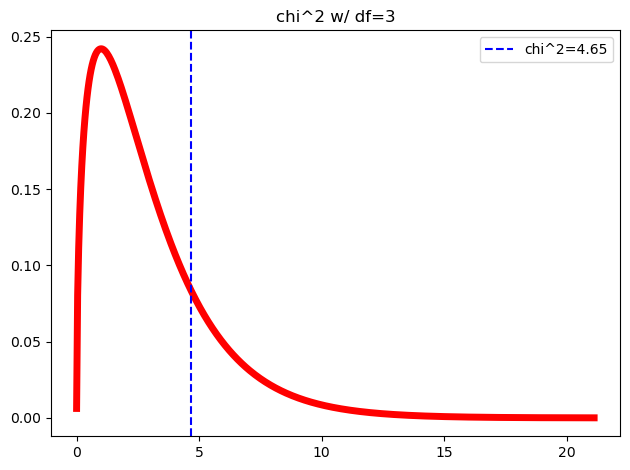

In [5]:
chisq_stat = 4.65
degrees_of_freedom = 3

x = np.linspace(
        stats.chi2.ppf(0.000001, degrees_of_freedom),
        stats.chi2.ppf(0.9999, degrees_of_freedom), 
        500
)

f, ax = plt.subplots()
ax.set_title('chi^2 w/ df=3')
ax.plot(x, stats.chi2.pdf(x, degrees_of_freedom), 'r-', lw=5)

# Chi-square statistic
ax.axvline(chisq_stat, ls='--', c='b', label='chi^2=4.65')
ax.legend()
plt.tight_layout()

In [6]:
# Note we subract since we want the area to the right of the statistic
p = 1 - stats.chi2.cdf(chisq_stat, df=degrees_of_freedom)
p

0.1992945576980797

So in this case, we cannot reject the null hypothesis that profile type and computer type are independent.

## Before You Ask, There _Is_ a Faster Method

And of course there's a SciPy method for this: [`scipy.stats.chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

In [7]:
obs

array([[ 68, 102, 246, 105],
       [ 86,  88, 216,  89]])

In [8]:
result = stats.contingency.chi2_contingency(obs)
chi, p, dof, exp = result
result


(4.647312487410241,
 0.19952075187952803,
 3,
 array([[ 80.234,  98.99 , 240.702, 101.074],
        [ 73.766,  91.01 , 221.298,  92.926]]))

# Exercise 👋 🧠

Suppose a survey was given to people asking their handedness and their level of education.

For fun, we would like to see if these categories are independent from another.


|            | High School|Some College | College  |
|:-----      | ------     | -----       | -----    |
|Righty      | 15         | 28          |   37     |
|Lefty       | 25         | 27          |   29     |
|Ambidextrous| 32         | 12          |   26     |


In [9]:
hand_obs = np.array([
    [ 15, 28, 37]
    ,[ 25, 27, 29]
    ,[32, 12, 26]
]
)

result = stats.contingency.chi2_contingency(hand_obs)

chi, p, dof, exp = result

result

(14.907604285169699,
 0.00489673880856604,
 4,
 array([[24.93506494, 23.2034632 , 31.86147186],
        [25.24675325, 23.49350649, 32.25974026],
        [21.81818182, 20.3030303 , 27.87878788]]))

<details>
    <summary>Answer</summary>

```python
righty = np.array([15, 28, 37])
lefty = np.array([25, 27, 29])
ambidextrous = np.array([32, 12, 26])
table = np.vstack((righty,
                   lefty,
                   ambidextrous))
stats.contingency.chi2_contingency(table)
```    
</details>

# Contingency Tables

Note in the earlier examples how useful those makeshift tables were! 

|         |  A    |  B    |  C    |  D    |         |
| ------- | ----- | ----- | ----- | ----- | ------- |
| **PC**  |  68   |  102  | 246   | 107   | **521** |
| **Mac** |  86   |  88   |  216  |  89   | **479** |
|         |**152**|**190**|**462**|**196**| **1000**|

Well, I didn't have that idea all by myself.

These are called **contingency tables** (aka _cross tabulation_ or _two-way frequency_ tables). These tables display the frequencies of categorical variables.

In this lecture, we looked at the most common contingency tables, **two-way** tables. These are sometimes called **$r \times c $ contingency tables**

> Note we had to feed in a contingency table (without totals) for `scipy.stats.contingency.chi2_contingency()`